# Working on Categorical Data
Intent is to enable understanding & utilizing Categorical data in a pandas dataFrame. 

Also, being able to  modify Categorical dtypes columns, generate features &  visualize the categorical data.

____
### Quick Refresher:
- Categorical data is a kind of **Qualitative Data**. It also significantly decreases the overall memory utilized by the DataFrame.

    - Ordinal Data - cariables have a natural order (eg. Rankings / Levels of Agreement etc. in a Survey). 
    <br>There is a certain relationship -- mostly a logical progression -- amongst the variables
    <br>E.g. Rankings in a survey (Excellent >Good >Average etc.), severity of incidents (Critical >High >Low)

    - Nominal Data - variables cannot be placed in a natural order i.e. don't contain any correlation to each other.
    <br>E.g. Countries / Colours etc.

- Assigning categorical dtype to a column **significantly reduces the DataFrame's memory footprint**.
<br>Use `df.info` or `df["col"].nbytes`to know the memory space taken up by a dataframes or series

<img src="https://intellspot.com/wp-content/uploads/2018/08/Types-of-Data-Infographic.png" width="600">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='darkgrid')

## Starting with the basic EDA steps:
- Importing the US Adults Census database. Trying to identify missing vlaues / column dtypes etc
- Identifying columns with **object dtype** - can be checked further if any of them can be converted to a categorical dtype (using `.astype`)

In [2]:
adults = pd.read_csv("./grownups_census.csv")

adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
adults.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- We can see there are certain columns - such as Marital status, Occupation, Race etc. that we can probe further for categorical data.

- Use `.value_counts()` `.describe()` to gain more detailed understanding of the nature of this data

In [4]:
adults["Marital Status"].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital Status, dtype: object

`.describe()` identified that the column contains 7 unique values 

In [5]:
adults["Marital Status"].value_counts(normalize=True)

Marital Status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: proportion, dtype: float64

We can definitely conclude that `Marital Status` column contains some distinct categorical variables & their proportions 

>You have been asked to build a machine learning model to predict whether or not a person makes over $50,000 in a year. To understand the target variable, `Above/Below 50k`, you decide to explore the variable in more detail.
_____
### TEST QUESTIONS
**Q - Explore the Above/Below 50k variable by printing out a description of the variable's contents.**

- 2 unique variables ; '<=50k' is the top variable (alphabet-wise) with 24,720 frequency count(no. of occurrences) 

**Q - Explore the Above/Below 50k variable by printing out a frequency table of the values found in this column.**

- Is observed that there's a greater proportion of people From the dataset who make less than 50K than people making more than 50K

In [6]:
adults["Above/Below 50k"].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object

In [7]:
adults["Above/Below 50k"].value_counts(normalize=True)

Above/Below 50k
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

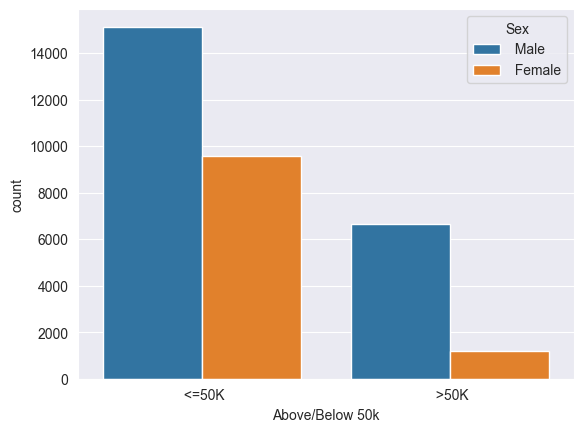

In [8]:
# Visualizing the above -- with added distinction of gender
sns.countplot(data=adults, x="Above/Below 50k", hue="Sex")
plt.show()


So its also observed that Males earn more than female counterparts in both income categories

In [9]:
print(adults["Marital Status"].dtype)

object


### Converting a column dtype to categorical 
Use `.astype()` to convert existing column dtype . **However, above method mostly help in converting to nominal categorical data** i.e. the logical relations (if any) might be missed out from being applied to the categorical variables.

OR use `pd.Categorical` on a list to create a series with 'Category' as default dtype. Details on [`pd.Categorical`](https://pandas.pydata.org/docs/user_guide/categorical.html). <br>
This method helps apply logical relations using the `ordered` & `categories` keywords.

**EXAMPLE: Converting an existing Series to categorical dtype :**

In [10]:
# EXAMPLES
# Converting an existing Series to categorical dtype
s = pd.Series(['small', 'medium', 'large', 'medium'])
s_cat = s.astype('category')
print(s_cat.dtype)

category


**EXAMPLE: Another method = declaring the dtype at the creation of the series :**

In [11]:
# EXAMPLES
# Another method = declaring the dtype at the creation of the series
aa = ['small', 'medium', 'large', 'medium']
asd = pd.Series(aa, dtype="category")
print(asd)

0     small
1    medium
2     large
3    medium
dtype: category
Categories (3, object): ['large', 'medium', 'small']


**EXAMPLE: Creating a Series with categorical data (without order):**

The categorical variables are simply nominal (no relation/ nor follow any logical progression)

In [12]:
# EXAMPLE1
# Creating a Series with categorical data
data = ['red', 'blue', 'green', 'red', 'blue']
categorical_series = pd.Categorical(data)
print(categorical_series)

['red', 'blue', 'green', 'red', 'blue']
Categories (3, object): ['blue', 'green', 'red']


**EXAMPLE: Creating a Series with categorical data (WITH order):**

Categorical variables are ordinal (ie. with relation AND follow any logical progression)

In [13]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Education": ["High School", "Masters", "PhD", "Bachelors", "High School"]
}

sample_df = pd.DataFrame(data)
sample_df

,Name,Education
0,Alice,High School
1,Bob,Masters
2,Charlie,PhD
3,David,Bachelors
4,Eve,High School


In [14]:
# Defining the order of the variables
edu_order = ["High School", "Bachelors", "Masters", "PhD"]

# Converting the Education column into a categorical column
sample_df["Education"] = pd.Categorical(sample_df["Education"], categories=edu_order, ordered=True)

In [15]:
sample_df.info()
sample_df["Education"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       5 non-null      object  
 1   Education  5 non-null      category
dtypes: category(1), object(1)
memory usage: 381.0+ bytes


0    High School
1        Masters
2            PhD
3      Bachelors
4    High School
Name: Education, dtype: category
Categories (4, object): ['High School' < 'Bachelors' < 'Masters' < 'PhD']

In [16]:
# Another example
adf_list = pd.Series(["Bad","Average", "Good" , "VGood", "Excellent" ])
adf = pd.Categorical( adf_list, categories=[5,4,3,2,1], ordered=True)

print(adf)

[NaN, NaN, NaN, NaN, NaN]
Categories (5, int64): [5 < 4 < 3 < 2 < 1]


### NOTE : WE can apply logical filterng to an ordinal category  

In [17]:
# Find all folks with Education level higher than Bachelors
sample_df[sample_df["Education"]>"Bachelors"]

,Name,Education
1,Bob,Masters
2,Charlie,PhD


In [18]:
# Also soring will be in logical order as opposed to lexical order
sample_df.sort_values("Education")

sample_df.sort_values("Education", ascending=False)

,Name,Education
2,Charlie,PhD
1,Bob,Masters
3,David,Bachelors
0,Alice,High School
4,Eve,High School


### Assiging dtypes while loading a dataset
- Using the `dtype` argument to pass `key-value` combinations with:
    - column name as the Key and 
    - required dtype as the value

In below example , converting a column during the initial datafrmae creation step itself

In [19]:
status_dtypes = {"Marital Status":"category"}
new_adults = pd.read_csv("./grownups_census.csv", dtype=status_dtypes)

In [20]:
new_adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              32561 non-null  int64   
 1   Workclass        32561 non-null  object  
 2   fnlgwt           32561 non-null  int64   
 3   Education        32561 non-null  object  
 4   Education Num    32561 non-null  int64   
 5   Marital Status   32561 non-null  category
 6   Occupation       32561 non-null  object  
 7   Relationship     32561 non-null  object  
 8   Race             32561 non-null  object  
 9   Sex              32561 non-null  object  
 10  Capital Gain     32561 non-null  int64   
 11  Capital Loss     32561 non-null  int64   
 12  Hours/Week       32561 non-null  int64   
 13  Country          32561 non-null  object  
 14  Above/Below 50k  32561 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


In [21]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


> As observed upon calling `info()` of both the dataframes, assigning category dtype to even one columns resulted in the new dataframe having a significantly lower memory usage (difference of almost 2MB)

In [22]:
aa

['small', 'medium', 'large', 'medium']

In [23]:
pd.Series(aa, dtype="category")

0     small
1    medium
2     large
3    medium
dtype: category
Categories (3, object): ['large', 'medium', 'small']

### Converting on sample dataset
Now , converting the columns - `"Workclass"`, `"Education"`, `"Relationship"`, and `"Above/Below 50k"` of the adult_Census dataframe into categories

In [24]:
# Before dtype conversion -- 
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
# After conversion of column dtypes --
change_dtype = ["Workclass", "Education" , "Relationship", "Above/Below 50k"]
adults[change_dtype] = adults[change_dtype].astype("category")

In [26]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              32561 non-null  int64   
 1   Workclass        32561 non-null  category
 2   fnlgwt           32561 non-null  int64   
 3   Education        32561 non-null  category
 4   Education Num    32561 non-null  int64   
 5   Marital Status   32561 non-null  object  
 6   Occupation       32561 non-null  object  
 7   Relationship     32561 non-null  category
 8   Race             32561 non-null  object  
 9   Sex              32561 non-null  object  
 10  Capital Gain     32561 non-null  int64   
 11  Capital Loss     32561 non-null  int64   
 12  Hours/Week       32561 non-null  int64   
 13  Country          32561 non-null  object  
 14  Above/Below 50k  32561 non-null  category
dtypes: category(4), int64(6), object(5)
memory usage: 2.9+ MB


> We can see a remarkable drop in the memory usage of the dataframe -- from 3.7MB to 2.9MB
______
### Grouping data by categories

Use of `.groupby()` ;  Helpful when trying to get catrgory-wise statistical insigts

**NOTE** - For some versions of python, We might need to pass `observer` parameter as False since we're grouping by columns that have a categorical dtype. 

In [27]:
print(adults.select_dtypes("int").columns)

Index(['Age', 'fnlgwt', 'Education Num', 'Capital Gain', 'Capital Loss',
       'Hours/Week'],
      dtype='object')


In [28]:
# Groups by the column "Above/Below 50k" ; returns mean of all numeric columns
adults.groupby(by="Above/Below 50k")[adults.select_dtypes('number').columns].mean()

C:\Users\abhijeet.bhambere\AppData\Local\Temp\ipykernel_12248\3214560366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adults.groupby(by="Above/Below 50k")[adults.select_dtypes('number').columns].mean()


,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
Above/Below 50k,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [29]:
# Grouping by multiple columns for Age column's median
adults.groupby(by=["Above/Below 50k","Marital Status"])["Age"].median()

C:\Users\abhijeet.bhambere\AppData\Local\Temp\ipykernel_12248\1287522727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adults.groupby(by=["Above/Below 50k","Marital Status"])["Age"].median()


Above/Below 50k  Marital Status       
<=50K            Divorced                 42.0
                 Married-AF-spouse        30.0
                 Married-civ-spouse       40.0
                 Married-spouse-absent    39.0
                 Never-married            25.0
                 Separated                38.0
                 Widowed                  60.0
>50K             Divorced                 45.0
                 Married-AF-spouse        29.5
                 Married-civ-spouse       44.0
                 Married-spouse-absent    47.5
                 Never-married            36.0
                 Separated                42.0
                 Widowed                  58.0
Name: Age, dtype: float64

______
### TEST QUESTIONS
**Q - find the mean Age of adults when grouping by the following categories:**

- "Workclass" (which has 9 categories)
- "Above/Below 50k" (which has 2 categories)
- "Education" (which has 16 categories).

In [30]:

adults.groupby(by=["Workclass","Above/Below 50k","Education"], observed=False)[["Age"]].mean()

Age
Workclass   Above/Below 50k Education              
?           <=50K           10th          33.357143
                            11th          32.372881
                            12th          30.736842
                            1st-4th       63.833333
                            5th-6th       53.642857
...                                             ...
Without-pay >50K            HS-grad             NaN
                            Masters             NaN
                            Preschool           NaN
                            Prof-school         NaN
                            Some-college        NaN

[288 rows x 1 columns]

In [31]:
gb = adults.groupby(by=["Workclass","Above/Below 50k","Education"], observed=False)

In [32]:
gb.ngroups

208

In [33]:
# Another way o fknowing groupby object summary
gb.size()

Workclass    Above/Below 50k  Education   
?            <=50K            10th             98
                              11th            118
                              12th             38
                              1st-4th          12
                              5th-6th          28
                                             ... 
Without-pay  >50K             HS-grad           0
                              Masters           0
                              Preschool         0
                              Prof-school       0
                              Some-college      0
Length: 288, dtype: int64

In [34]:
adults.groupby(by=["Sex","Above/Below 50k"], observed=False).size()

Sex     Above/Below 50k
Female  <=50K               9592
        >50K                1179
Male    <=50K              15128
        >50K                6662
dtype: int64

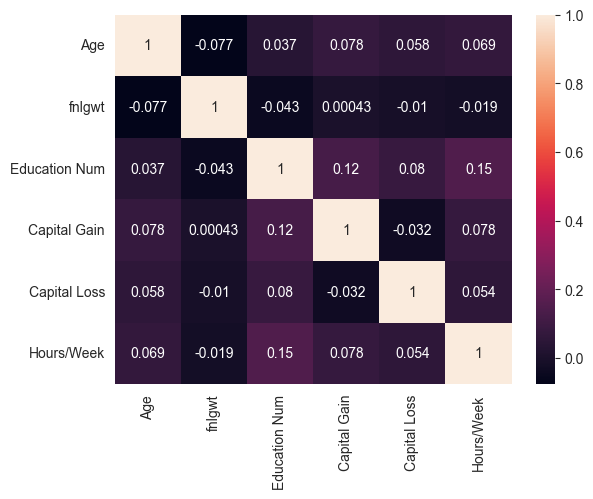

In [35]:
sns.heatmap(adults.corr(numeric_only=True), annot=True)
plt.show()

# Categoical pandas Series
Learning of all methods available to apply on a pandas Series with dtype Category

### Set / add / remove categories

In [36]:
dogs = pd.read_csv("./Shelterdogs.csv")
dogs.head(2)

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN


In [37]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

Checking different columns for their value counts to identify which columns can be converted to categorical

**NOTE:** set the `dropna` parameter to False to include even NaN values (if present) into the value_count result.


In [38]:
dogs["coat"].value_counts(dropna=False)

coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64

### The `Series.cat` accessor
More details in [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html). Most commonly used parameters:
**Accessing Categorical Properties:**
It allows direct access to properties unique to categorical data, such as:
- `.cat.categories`: Returns the unique categories (labels) defined for the categorical data.
- `.cat.ordered`: Indicates whether the categories have a defined order.
- `.cat.codes`: Returns the integer codes assigned to each category, representing their underlying numerical representation.

**Manipulating Categories:**
The .cat accessor provides methods for modifying the categories themselves:
- `.cat.rename_categories()`: Renames existing categories.
- `.cat.reorder_categories()`: Changes the order of categories.
- `.cat.add_categories()`: Adds new categories to the existing set.
- `.cat.remove_categories()`: Removes specified categories.
- `.cat.remove_unused_categories()`: Removes categories that are defined but not present in the data.
- `.cat.set_categories()`: Sets a completely new set of categories.

NOTE: The column dtype has to be convertd to category first.

In [39]:
new_dogsdf = pd.read_csv("./Shelterdogs.csv")
new_dogsdf.head(2)

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN


In [40]:
new_dogsdf["coat"].value_counts()

coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64

In [41]:
# Converting dtype to category
new_dogsdf["coat"] = new_dogsdf["coat"].astype("category")

In [42]:
new_dogsdf["coat"].dtype

CategoricalDtype(categories=['long', 'medium', 'short', 'wirehaired'], ordered=False, categories_dtype=object)

In [43]:
# Setting categories -- unordered
new_dogsdf["coat"] = new_dogsdf["coat"].cat.set_categories(new_categories=["short", "medium", "long"])
new_dogsdf["coat"].head()

0     short
1     short
2     short
3    medium
4     short
Name: coat, dtype: category
Categories (3, object): ['short', 'medium', 'long']

In [44]:
# Values not listed in categories list have been dropped 
new_dogsdf["coat"].value_counts(dropna=False)

coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64

In [45]:
# Setting categories -- Ordered
new_dogsdf["coat"] = new_dogsdf["coat"].cat.set_categories(new_categories=["short", "medium", "long"], ordered=True)
new_dogsdf["coat"].head()

0     short
1     short
2     short
3    medium
4     short
Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

Notice how the rows with 'wirehaired' entry previously now have NaN instead. 

This is because there is no category assigned while setting the `new_categories` in the latest update to the dataframe (i.e. when the `.cat.set_categories()` method was applied)

**Adding the remaining category using `.cat.add_categories()` method :**

In [46]:
new_dogsdf["coat"] = new_dogsdf["coat"].cat.add_categories(new_categories=["wirehaired"])

**NOTE that this only adds a new categorical variable that _CAN BE_ assigned but It is yet to be assigned in the column values.** 

Assigning one of these categorical variables to the rows is done using filtering of rows by various conditions (filtering)OR by methods\ accessors(`loc`\ `iloc`) based on observations / domain knowledge.


______
### TEST QUESTIONS - 
**Q - One of the most common questions they have been receiving lately is: "What type of area was the dog previously kept in?".** <br> 
You are setting up a pipeline to do some analysis and want to look into what information is available regarding the "keep_in" variable.

In [47]:
new_dogsdf["keep_in"].value_counts(dropna=False)

keep_in
both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: count, dtype: int64

>This shows there are about 1K records without any information on area to keep the dog in

In [48]:
new_dogsdf["keep_in"] = new_dogsdf["keep_in"].astype("category")

In [49]:
pd.Series(new_dogsdf["keep_in"]).astype("category")

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                ...         
2932                  garden
2933                     NaN
2934                     NaN
2935                     NaN
2936    both flat and garden
Name: keep_in, Length: 2937, dtype: category
Categories (3, object): ['both flat and garden', 'flat', 'garden']

In [50]:
new_categories = ["Unknown History", "Open Yard (Countryside)"]
new_dogsdf["keep_in"] = new_dogsdf["keep_in"].cat.add_categories(new_categories = new_categories)

In [51]:
new_dogsdf["keep_in"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: keep_in, dtype: category
Categories (5, object): ['both flat and garden', 'flat', 'garden', 'Unknown History', 'Open Yard (Countryside)']

Before adopting dogs, parents might want to know whether or not a new dog likes children. When looking at the adoptable dogs dataset, dogs, you notice that the frequency of responses for the categorical Series "likes_children" has 'maybe'as one of the ctegorical variables.

**Q - The owner of the data wants to convert all "maybe" responses to "no", as it would be unsafe to let a family adapt a dog if it doesn't like children.**

In [52]:
new_dogsdf["likes_children"].value_counts() #.cat.remove_categories(removals=["maybe"])

likes_children
yes    1172
no       47
Name: count, dtype: int64

### Renaming categories
`Series.cat.rename_categories(new_categories=dict)`

The category variable is renamed by passing a key-value pair {old_name: new_name}

Renaming will not work:
- Category name already exists
- Two previous categories cannot be renamed to same category

In [53]:
# Renaming the "unknown mix" category to just "unknown"
new_dogsdf["breed"].value_counts()
new_dogsdf["breed"] = new_dogsdf["breed"].astype("category")

In [54]:
new_dogsdf["breed"] = new_dogsdf["breed"].cat.rename_categories(new_categories={"Unknown Mix":"Unknown"})

In [55]:
new_dogsdf["breed"].value_counts()

breed
Unknown                                                           1524
German Shepherd Dog Mix                                            190
Dachshund Mix                                                      147
Labrador Retriever Mix                                              83
Staffordshire Terrier Mix                                           62
                                                                  ... 
Tibetan Terrier                                                      1
American Bulldog Mix                                                 1
Alaskan Malamute, Caucasian Ovtcharka, German Shepherd Dog Mix       1
Akita, Labrador Retriever Mix                                        1
Akita, German Shepherd Dog Mix                                       1
Name: count, Length: 277, dtype: int64

### Renaming categories with lambda functions


In [56]:
new_dogsdf["color"] = new_dogsdf["color"].astype("category")

In [57]:
# Converting 
new_dogsdf["color"] = new_dogsdf["color"].cat.rename_categories(lambda x:x.title())

In [58]:
new_dogsdf.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown,12/10/19,12/11/19,12/11/19,Red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown,12/1/19,12/1/19,12/9/19,Black And White,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown,12/8/19,12/23/19,12/8/19,Saddle Back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown,12/8/19,12/23/19,12/8/19,Yellow-Brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,Black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
new_dogsdf["color"].cat.categories

Index(['Apricot', 'Black', 'Black And Brown', 'Black And Tan',
       'Black And White', 'Brown', 'Brown And White', 'Dotted', 'Golden',
       'Gray', 'Gray And Black', 'Gray And White', 'Red', 'Red And White',
       'Sable', 'Saddle Back', 'Spotty', 'Striped', 'Tricolor', 'White',
       'Wild Boar', 'Yellow', 'Yellow-Brown'],
      dtype='object')

### Collapsing categories
Passing a `{"current_name":"old_name"}` dict to a `Series.replace()` method will only operate on the string values in the Series.<br>
Also ,the column dtype will be changed from `category` to `object`.

For given example changing some of the categories into one single category.

The above method is used because multiple categories cannot be converted into one single category will raise a `ValueError`. 

In [60]:
update_colors = {'Black And Brown':'Black', 'Black And Tan':'Black', 'Black And White':'Black'}

In [64]:
# Below code will raise a ValueError: Categorical categories must be unique
# new_dogsdf["color"] = new_dogsdf["color"].cat.rename_categories(update_colors)

In [ ]:
new_dogsdf["color"].value_counts()

color
Black              1252
Brown               293
Yellow-Brown        212
Apricot             142
Brown And White     124
White               124
Sable               118
Tricolor             99
Saddle Back          91
Striped              89
Gray                 64
Yellow               63
Golden               61
Red                  53
Spotty               47
Gray And White       35
Gray And Black       28
Wild Boar            18
Red And White        14
Dotted               10
Name: count, dtype: int64

### Re-ordering categories
Useful when creating ordinal categorical variables.

In [ ]:
dogs["coat"].value_counts()

coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64

In [ ]:
new_dogsdf["coat"].cat.categories

Index(['short', 'medium', 'long', 'wirehaired'], dtype='object')

In [ ]:
# Re-ordering the coat column
dogs["coat"] = new_dogsdf["coat"].cat.reorder_categories(new_categories=["short","medium","wirehaired","long"], ordered=True)


In [ ]:
dogs["coat"].head(2)

0    short
1    short
Name: coat, dtype: category
Categories (4, object): ['short' < 'medium' < 'wirehaired' < 'long']

All further visualizaitons/ print/ groupby outputs will show this order

In [ ]:
dogs.groupby(by=["coat"], observed=False)["age"].mean()

coat
short         8.364746
medium        9.027982
wirehaired         NaN
long          9.552056
Name: age, dtype: float64

### Cleaning & accessing data
Some common issues while handling categorical variables in a dataframe include:
- Inconsistent values (i.e. some values are capitalized while some are in smallcase / whitespaces)
- Misspelled values
- Wrong dtypes (i.e. ensure column dtype is `category`)

Firstly , identify the issues using `value_counts()` method OR the`Series.cat.categories` accessor.

Once one or more of the above issues is idenfited, we can the fix the issues :
- mostly it'll be using some `str.` methods such as `.title` , `.capitalize` , `.lower` etc
- OR replacing one or more variables with the correct one `Series.replace(replace_dict_map)` / `Series.cat.rename_categories(replace_dict_map)`

NOTE: Column dtype may have to be converted back to `category`.

In [67]:
new_dogsdf["get_along_males"].value_counts()

get_along_males
yes    1470
no      163
Name: count, dtype: int64

### Filtering using `str` methods

In [70]:
new_dogsdf[new_dogsdf["breed"].str.contains("Shepherd", regex=True)]

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
27,4488,Kehlani,0.42,female,German Shepherd Dog Mix,12/1/19,12/1/19,12/7/19,Black And Brown,short,medium,NaN,NaN,yes,NaN,NaN,NaN,NaN,both flat and garden
63,1787,Inárcsi Hektor,0.25,male,"German Shepherd Dog, Staffordshire Terrier Mix",11/24/19,11/24/19,11/25/19,Yellow-Brown,short,medium,no,NaN,yes,yes,yes,yes,yes,both flat and garden
100,23736,Csöpi,9.33,female,German Shepherd Dog Mix,11/14/19,11/29/19,11/14/19,Saddle Back,medium,large,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,23730,Suzi,13.08,female,German Shepherd Dog Mix,11/13/19,11/28/19,11/14/19,Sable,medium,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,1778,Alsónémedi Sidney,0.42,female,"Dachshund, German Shepherd Dog Mix",11/11/19,11/11/19,11/12/19,Black,short,small,no,NaN,yes,yes,yes,yes,yes,both flat and garden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,20,Lea,13.17,female,"English Bloodhound, German Shepherd Dog Mix",12/1/06,5/1/07,7/23/07,Tricolor,short,medium,yes,NaN,yes,yes,yes,yes,NaN,both flat and garden
2917,14,Kormi,17.67,male,German Shepherd Dog Mix,4/1/03,4/1/04,7/23/07,Black,short,medium,no,NaN,yes,yes,yes,yes,NaN,garden
2918,6,Fifi,13.67,female,German Shepherd Dog Mix,4/1/07,4/1/07,5/21/07,Sable,short,medium,yes,NaN,yes,yes,yes,yes,NaN,NaN
2925,427,Yuki,13.75,male,German Shepherd Dog Mix,6/1/06,6/1/06,11/29/06,Red,short,medium,yes,NaN,yes,yes,yes,yes,no,both flat and garden


### Filtering using `loc` / `iloc` accessors

In [78]:
new_dogsdf["size"] = new_dogsdf["size"].astype("category")

In [80]:
new_dogsdf.loc[new_dogsdf["breed"].str.contains("Shepherd",regex=False),"size"].value_counts(sort=False)

size
large     112
medium    167
small       5
Name: count, dtype: int64

In [ ]:
new_dogsdf["color"].str.lo

0                   Red
1       Black And White
2           Saddle Back
3          Yellow-Brown
4                 Black
             ...       
2932       Yellow-Brown
2933            Striped
2934              Black
2935    Black And Brown
2936              Sable
Name: color, Length: 2937, dtype: object

In [93]:
new_dogsdf.head()
new_dogsdf.loc[1,"coat"]

'short'

# Visualizing categorical data

Using seaborn to create visualizations

Loading the dataset --> inspecting the dataframe --> identifying columns that can be set to category dtype

In [96]:
hotels = pd.read_csv("./lasvegas_tripadvisor.csv")
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [98]:
hotels["Score"].value_counts()

Score
5    227
4    164
3     72
2     30
1     11
Name: count, dtype: int64

In [99]:
hotels["Pool"].value_counts()

Pool
YES    480
NO      24
Name: count, dtype: int64

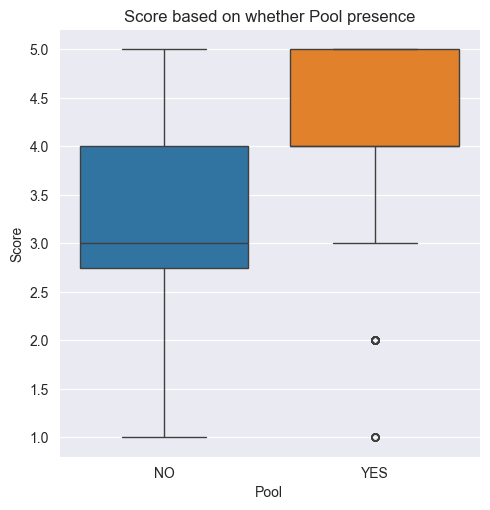

In [102]:
sns.catplot(data=hotels, x="Pool", y="Score", kind="box" ,hue="Pool")
plt.title("Score based on whether Pool presence")
plt.show()

>It appers that a couple of guests that stayed at hotels with pools did not like the experience

### TEST QUESTION --
When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful.<br>
If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable "Helpful votes" across the different categories found in the "Traveler type" variable.


- Set the font size of your graphic to be 1.25.
- Set the background of the graphic to be "darkgrid".
- Create a boxplot using catplot() with "Helpful votes" as the continuous variable split across each "Traveler type". Make sure that you are using the reviews dataset.

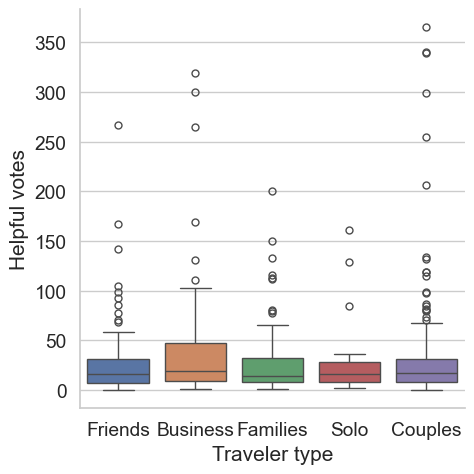

In [108]:
sns.set_theme(font_scale=1.25)
sns.set_style("whitegrid")
sns.catplot(data=hotels , x="Traveler type" , y="Helpful votes", kind="box", hue="Traveler type")

plt.show()

>All traveler types have similar central tendencies - Median of all helpful votes nearly along similar counts (about 25)

>Business & couple travellers have left the most helpful reviews - These outliers represent reviews that received exceptionally high numbers of helpful votes.<br>
Business travelers have some of the highest individual outliers, with several reviews receiving 300+ helpful votes

>**Overall Conclusion:** The data suggests that while most reviews across all traveler types receive similar levels of community appreciation (as shown by similar medians), certain reviews from Business, Friends, and Couples travelers occasionally achieve viral-like status with exceptionally high helpful vote counts.<br>
This could indicate that these traveler types sometimes produce content that resonates more broadly with the reviewing community, possibly due to more detailed insights, unique perspectives, or better writing quality.

### Seaborn Bar plots

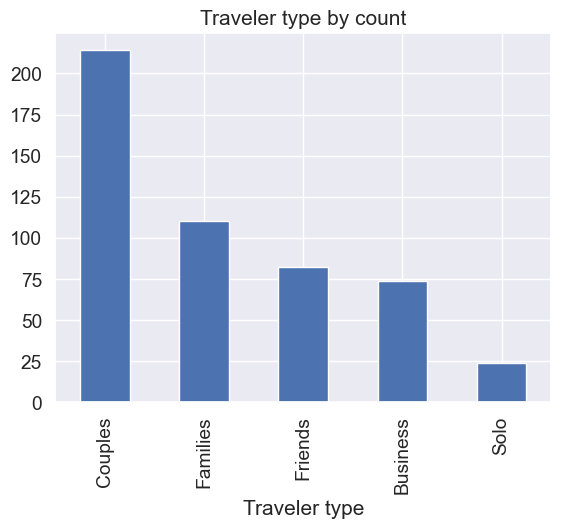

In [115]:
sns.set_style('darkgrid')
hotels["Traveler type"].value_counts().plot(kind='bar')
plt.title("Traveler type by count")
plt.show()

However bar plots in seaborn are applied with a different intent: summarize a numerical variable across different levels of a categorical variable.

Those black ticks on top of each count represents range of the 95% confidence interval -- ie. the range extent of values where the true population mean is likely to fall 95% of the time.

A shorter confidence interval indicates greater certainty about the mean & vice-versa

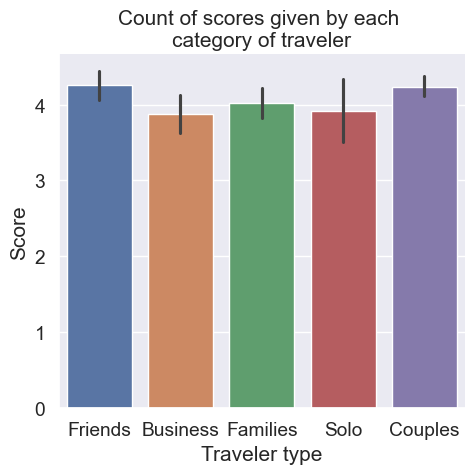

In [121]:
sns.catplot(data=hotels, x="Traveler type", y='Score', kind='bar' ,hue="Traveler type", )
plt.title("Count of scores given by each \ncategory of traveler")
plt.tight_layout()
plt.show()

### Effect of setting `category` dtype on a column
How it affects visualization when a column is set to category dtype

In [122]:
# Converting Traveler type to category dtype
hotels["Traveler type"] = hotels["Traveler type"].astype("category")

# Checking the categories for this column
hotels["Traveler type"].cat.categories

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

Plotting again after declaring the category dtype.

Notice the order of the categorical variables is now as per arrangement of the category

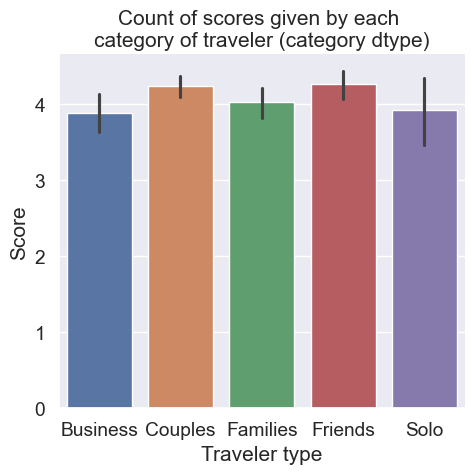

In [123]:
sns.catplot(data=hotels, x="Traveler type", y='Score', kind='bar' ,hue="Traveler type", )
plt.title("Count of scores given by each \ncategory of traveler (category dtype)")
plt.tight_layout()
plt.show()

### Use of the `hue` parameter

Helps introduce another categorical variable into the plot that adds a layer of distinction to the visual

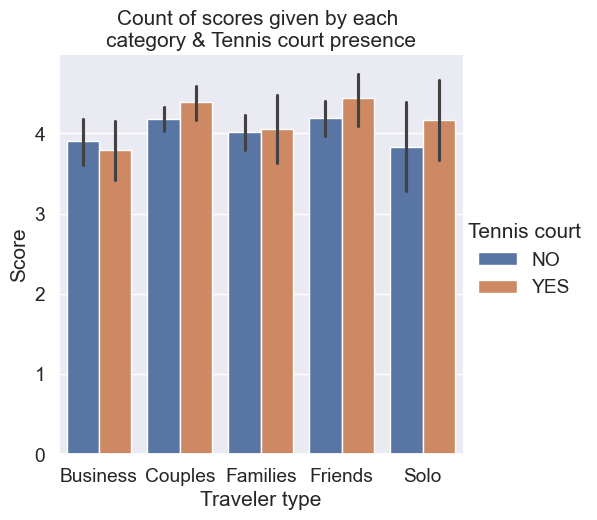

In [127]:
sns.catplot(data=hotels, x="Traveler type", y='Score', kind='bar' ,hue="Tennis court", )
plt.title("Count of scores given by each \ncategory & Tennis court presence")
plt.show()

>Hotels with tennis courts recieved good ratings from all Traverler tyeps except Business class who seemd to favour them relatively less

### TEST QUESTOINS :
Las Vegas hotels are seeing large variations in how helpful reviews appear to other people. The owners of these hotels are curious if there are times of the year when reviews have been more helpful to their potential guests.

Create a bar plot of the average number of helpful votes per review across the categorical variable "Period of stay"

In [128]:
hotels["Period of stay"].value_counts()

Period of stay
Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: count, dtype: int64

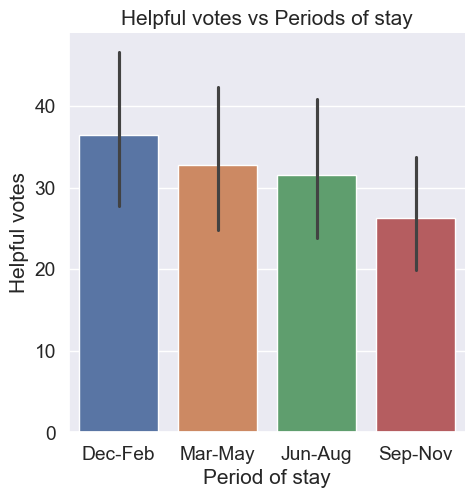

In [131]:
sns.catplot(data=hotels, x="Period of stay" , y='Helpful votes', kind='bar', hue="Period of stay")

plt.title("Helpful votes vs Periods of stay")
plt.show()

>Seems most detailed & helpful reviews are from December-Feb period while those from Sep-Nov period are least helpful.

In [132]:
hotels.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Pool', 'Gym',
       'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name',
       'Hotel stars', 'Nr. rooms', 'User continent', 'Member years',
       'Review month', 'Review weekday'],
      dtype='object')